# Download and filter Sentinel-1 images

**Why this module**: I oftentimes have to make a Dataset of Sentinel-1 images I can use for deep learning. This is quite difficult. I therefore made this module using, e.g., the SentinelAPI and ofter stuff. 

Simply put:
- Get Metadata from the region of interest.
- Filter the data, so you only get what you want
- Download, e.g., the thumbnails or the full data. 
- Can download thumbnaisl, raw, grd or slc. All is fine.



Requirements:
- User on Copernicus hub (for metadata)
- User on earthdata (for download)

# Imports

In [2]:

import sys, os, glob
sys.path.append(os.getenv('src_dir'))
from src.metadata import Sentinel_metadata
from src.download import Satellite_download

## Fetching data near Denmark

In [10]:
with Sentinel_metadata() as met:
    met.area([17.9,18,56.7,58])
    met.get_metadata(sensor='s1_slc',start_data='20220109',end_date='20221010')
    met.iw() #filer so we only have IW
    

Querying products: 100%|██████████| 224/224 [00:00<00:00, 127.56product/s]


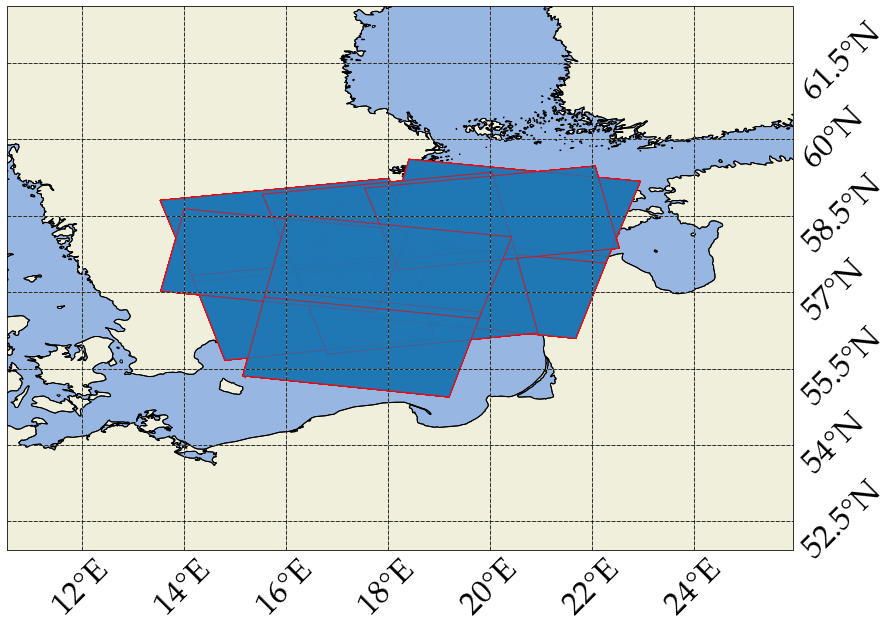

In [11]:
met.plot_image_areas() # Showing extent of images

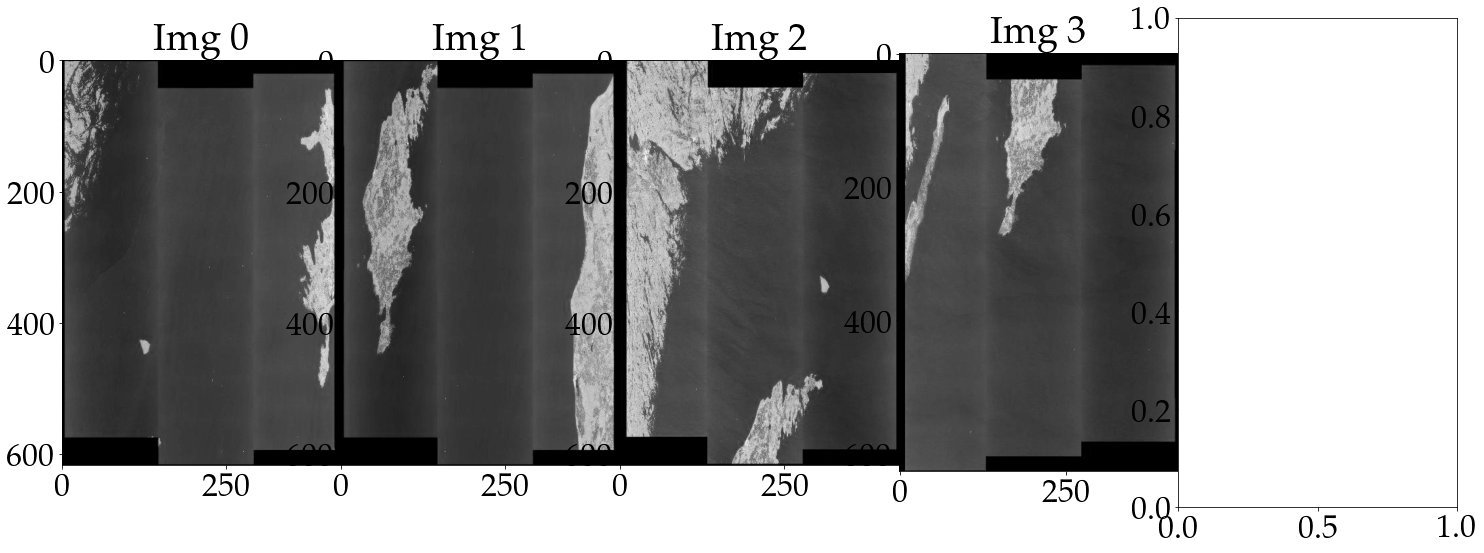

In [4]:
met.show_cross_pol(4)

In [7]:
met.products_df.tail()

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,missiondatatakeid,...,producttype,platformname,platformidentifier,instrumentname,instrumentshortname,productclass,polarisationmode,acquisitiontype,uuid,geometry
8c19dc8c-f126-4f54-b5c5-f5acf42905dd,S1A_IW_SLC__1SDV_20220115T162857_20220115T1629...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-01-15T16:28:57.382Z, Instrument: SA...",false,2022-01-15 16:28:57.382,2022-01-15 16:29:25.294,2022-01-15 17:54:21.938,323205,...,SLC,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,8c19dc8c-f126-4f54-b5c5-f5acf42905dd,"MULTIPOLYGON (((16.80707 55.78273, 20.93453 56..."
cb794eb1-0271-47df-86c9-c45b71a79611,S1A_IW_SLC__1SDV_20220115T051552_20220115T0516...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-01-15T05:15:52.559Z, Instrument: SA...",false,2022-01-15 05:15:52.559,2022-01-15 05:16:19.551,2022-01-15 08:36:46.874,323145,...,SLC,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,cb794eb1-0271-47df-86c9-c45b71a79611,"MULTIPOLYGON (((17.75962 56.59904, 18.41231 58..."
7c12ccf7-57c6-4716-ae91-5a55a851eb0a,S1A_IW_SLC__1SDV_20220110T162111_20220110T1621...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-01-10T16:21:11.703Z, Instrument: SA...",false,2022-01-10 16:21:11.703,2022-01-10 16:21:38.665,2022-01-10 18:51:50.187,322615,...,SLC,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,7c12ccf7-57c6-4716-ae91-5a55a851eb0a,"MULTIPOLYGON (((18.20992 57.43675, 22.52612 57..."
0805333b-3754-4ceb-a0e6-6e98a5b5ca4f,S1A_IW_SLC__1SDV_20220110T050805_20220110T0508...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-01-10T05:08:05.898Z, Instrument: SA...",false,2022-01-10 05:08:05.898,2022-01-10 05:08:33.847,2022-01-10 07:33:30.882,322551,...,SLC,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,0805333b-3754-4ceb-a0e6-6e98a5b5ca4f,"MULTIPOLYGON (((19.19243 54.94298, 19.82754 56..."
74c64573-1c03-4c60-b5ed-b3f14cab4c3c,S1A_IW_SLC__1SDV_20220110T050741_20220110T0508...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-01-10T05:07:41.075Z, Instrument: SA...",false,2022-01-10 05:07:41.075,2022-01-10 05:08:08.058,2022-01-10 06:39:47.715,322551,...,SLC,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,74c64573-1c03-4c60-b5ed-b3f14cab4c3c,"MULTIPOLYGON (((19.77539 56.47849, 20.42503 58..."


# Download data

Alright, lets say that we want image 0 and 1, we simply do:

In [9]:
with Satellite_download(met.products_df) as dwl:
    try:
        os.makedirs(folder, exist_ok=True)
        #save metadata
        met.products_df.to_pickle(f'{folder}/dataframe.pkl')
        #download the thumbnails
        dwl.download_thumbnails(folder=f'{folder}/thumbnails') 
    except Exception as e:
        print(e)

name 'folder' is not defined
